#### Part1. 기본학습 - AI 핵심이론 및 활용     
    chp08 - 지도 학습 : (2) Deep Learning 

In [1]:
## 파이썬, 텐서플로 버전 및 호환여부 확인 코드 
import sys
import tensorflow as tf
print("Python 버전:", sys.version)
print("TensorFlow 버전:", tf.__version__)

## GPU 확인 
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Numbers of GPU = {len(gpus)}")
    for gpu in gpus:
        print(f"Available GPU = {gpu}")
else:
    print("Only CPU abailable")

Python 버전: 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
TensorFlow 버전: 2.19.0
Only CPU abailable


#### activation fuction (활성화 함수)
- sigmoid : 입력값을 비선형 형태로 0~1로 변형, 은닉층 함수로 사용하면 기울기 소실(vanishing gradient) 문제 발생 
- hyperbolic tangent(tanh) : 시그모이드가 은닉층의 수가 많아지면 학습효과가 떨어지는 문제 극복하고자 고안, 마찬가지로 vanishing gradient 문제 발생 
- ReLU : 가장 많이 사용됨. 입력값이 양수면 그대로, 음수면 0으로 출력 
- Leaky ReLU : 렐루의 단점 보완. 입력값이 음수일때 매우 작은값을 출력하여 음수입력값의 영향 손실 방지 
- softmax : 다중 분류모델에 사용. 모든 입력값을 0~1 사이 값으로 정규화 하여 출력 (즉 확률값을 출력함)

#### forward / backward propagation (순전파 / 역전파)
- 순전파를 통해 이전 단계의 출력값과 현 단계 입력값들의 곱을 다음단계로 출력함 
- 최종 출력값을 손실함수로 계산하여, 오차를 역전파 함으로써 모든 가중치와 bias를 업데이트함 

#### lost function(손실함수)
- 회귀모델의 손실함수 : MSE(계산과 분석에 용이), MAE(MAE는 상대적으로 이상치에 덜 민감)
- 분류모델의 손실함수 : 이진분류는 Binary Cross Entrophy, 다중분류는 Categorical Cross Entrophy를 사용 

#### Gradient Decent (경사하강법) 
- 경사하강법 : 많은 계산 필요하여 속도가 느림 
- 확률적 경사하강법 : 무작위 샘플링 1개 데이터 사용, 속도는 빠르나 노이즈가 심함 
- 미내배치 경사하강법 : 데이터를 n개로 나누고, n개당 한번식 경사하강법 시행 (*보통 최적화를 위해 Momentum + RMSSprop인 Adam 알고리즘을 통해 최적화)

#### Drop out 
- 심층 신경망 훈련시 은닉 노드의 일부를 확률p 만큼 랜덤하게 드롭, 확률은 사용자가 지정(보통 p=0.0 사용)

#### Tensor
- scalar : 값을 1개의 수치로 표현(1차원), vector : 값을 2개 수치로 표현(2차원), matrix : 값을 3개 수치로 표현(3차원)
- tensor : 2차원 이상 다차원을 가진 배열 (3,4,5,6 ... 차원)
---

In [2]:
# Keras simple example 
import numpy as np 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

x = [1,2,3,4,5,6,7,8,9,10]
y = [3,5,7,9,11,13,15,17,19,21]
x_train = np.array(x).reshape(-1,1)
y_train = np.array(y)

print(x_train.shape, y_train.shape)

(10, 1) (10,)


In [3]:
## 균등분포로 신경망 초기화 
## 입력 데이터가 하나의 피처를 가지고 있는 간단한 신경망을 생성하고, 모델의 구조를 확인
initializer = tf.keras.initializers.GlorotUniform(seed=42)
model = Sequential()
model.add(Dense(units=1, input_shape = (1,), kernel_initializer=initializer))
model.summary()

c:\Users\Seoyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
## 모델 최적화 (compile : optimizer, loss함수 지정, 모델성능 평가위한 metrics함수 지정)
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

## 모델학습 
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 323.2250 - mae: 16.1452
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.9011 - mae: 3.5555
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.7542 - mae: 0.8584
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1045 - mae: 0.2802
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0741 - mae: 0.2255
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0721 - mae: 0.2238
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0715 - mae: 0.2230
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0709 - mae: 0.2223
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0703 - mae: 0.2214
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0697 - mae: 0.2205
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0691 - mae: 0.2196
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0685 - mae: 0.2187
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33m

In [5]:
## 모델 가중치, 특정 레이어의 가중치와 바이어스 확인 
print(model.weights)
print(model.layers[0].weights[0].numpy()) 
print(model.layers[0].bias.numpy())

[<Variable path=sequential/dense/kernel, shape=(1, 1), dtype=float32, value=[[2.0558481]]>, <Variable path=sequential/dense/bias, shape=(1,), dtype=float32, value=[0.6111956]>]
[[2.0558481]]
[0.6111956]


In [6]:
## 학습된 모델로 예측하기 
model.predict(np.array(
                      [[11], [12], [13]]
                      ))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[23.225527],
       [25.281374],
       [27.337221]], dtype=float32)

---
#### 항공사 고객만족 모델 구현 실습 
---

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/Invistico_Airline.csv')
print(df.shape)
df.head()

(129880, 23)


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [8]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [9]:
## 'Arrival Delay in Minutes' 컬럼의 결측치 처리 
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
df['Arrival Delay in Minutes'] = mean_imputer.fit_transform(df[['Arrival Delay in Minutes']])

df.isnull().sum().sum()

0

In [10]:
## categorical data -> encoding 
## 'object' 타입의 컬럼명을 모두 찾아 리스트에 저장 
cols = list(df.select_dtypes(include=['object']).columns)
print(cols)
print('-'*100)

## 수치형으로 변경 : 0 and 1, Ordinary encoding, One-Hot encoding 
print(df['satisfaction'].value_counts())
print('-'*100)
print(df['Gender'].value_counts())
print('-'*100)
print(df['Customer Type'].value_counts())
print('-'*100)
print(df['Type of Travel'].value_counts())
print('-'*100)
print(df['Class'].value_counts())
print('-'*100)

## 0 and 1
df['satisfaction'].replace(['dissatisfied', 'satisfied'], [0,1], inplace=True)

## Ordinary 
categiries = pd.Categorical(df['Class'], 
                            categories=['Eco', 'Eco Plus', 'Business',], 
                            ordered=True    ## 본 카테고리 변수는 'Eco'<'Eco Plus'<'Business'의 순서가 존재함 
                            )
labels, unique = pd.factorize(categiries, sort=True)  ## categories에 대해 unique(고유한)값으로 순서대로 factorize(정수할당)
df['Class'] = labels

## One-Hot 
cat_cols = ['Gender', 'Customer Type', 'Type of Travel']
df = pd.get_dummies(df, columns=cat_cols)

## Boolean을 0, 1로 변환하고 출력 
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)
df.head(2)

['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']
----------------------------------------------------------------------------------------------------
satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Gender
Female    65899
Male      63981
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64
---

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
0,1,65,0,265,0,0,0,2,2,4,...,3,2,0,0.0,1,0,1,0,0,1
1,1,47,2,2464,0,0,0,3,0,2,...,3,2,310,305.0,0,1,1,0,0,1


In [11]:
df.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Gender_Female                          int64
Gender_Male                            int64
Customer T

In [12]:
# data split, scaling 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction'].reset_index(drop=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size = 0.2, 
                                                  random_state=42, 
                                                  stratify=y)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
print('-'*100)

'''
검증 데이터에 대해 fit_transform을 사용하면 의 통계 정보(최소값/최대값)가 학습에 포함되어 데이터 누수가 발생할 수 있습니다.
X_train으로 학습된 최소값/최대값으로 X_val을 변환해야, 스케일링 기준이 동일해지고 평가 과정이 일관성을 유지합니다.
'''
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

print(X_train)

(103904, 25) (25976, 25) (103904,) (25976,)
----------------------------------------------------------------------------------------------------
[[0.15384615 0.         0.34502246 ... 1.         1.         0.        ]
 [0.33333333 0.         0.44051587 ... 1.         1.         0.        ]
 [0.48717949 0.         0.26546877 ... 0.         1.         0.        ]
 ...
 [0.35897436 1.         0.31459209 ... 0.         1.         0.        ]
 [0.17948718 0.         0.25010868 ... 0.         0.         1.        ]
 [0.19230769 1.         0.62860455 ... 0.         1.         0.        ]]


In [13]:
'''
- X_train.shape = (103904, 25) --> 입력값 25개 
- 다층 신경망(DNN), activation function = ReLU
- 고객의 만족여부 예측이 목적 --> 출력값 1개 : 분류모델, sigmoid 사용 
'''
# 필요한 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random

# 모델 시드 고정하기
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Keras의 Sequential 객체로 딥러닝 모델 구성하기
'''
- 뉴런의 갯수는 경험적으로 지정함. 보통 입력값(25개)보다 조금 큰 값을 처음 세팅함 
- 일반적으로 각 레이어의 뉴런 수를 점진적으로 증가시키거나 감소시키는 패턴을 사용 (32 → 64 → 128 → 64 → 32, 점진적 증가 후 감소)
- **2의 거듭제곱 값(예: 32, 64, 128)**을 사용하는 것이 일반적. 이는 하드웨어 최적화와 연산 효율성 측면에서 유리하며, 딥러닝 분야에서 널리 사용되는 관행
- 뉴런 수는 하이퍼파라미터 최적화를 통해 조정가능 (ex. GridSearchCV, RandomSearchCV, 베이지안최적화 등)
- 파라미터 갯수는 각 레이어의 "(입력값x노드수)+노드수"의 총 합계임. *앞의 노드수는 가중치, 뒤의 노드수는 바이어스의 갯수 
- 따라서 아래의 경우 (25x32)+32 + (32x64)+64 ... (32x1)+1 = 21,633개
'''
initializer = tf.keras.initializers.GlorotUniform(seed=42) #모델 시드 고정하기
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(25,),kernel_initializer=initializer))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 32)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,633 (84.50 KB)

 Trainable params: 21,633 (84.50 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#compile 
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [17]:
#early stop : val loss가 개선되지 않는 epochs가 10회 이상이면 중단 
es = EarlyStopping(monitor='val_loss',
                   min_delta = 0,            ## val_loss가 최소델타값보다 줄어들면 epoch 계속 
                   patience=10,              ## val_loss가 줄어들지 않아도 10회는 두고 보자 
                   verbose=1,                ## epoch 중단시 메시지 출력 
                   restore_best_weights = True  ## epoch 종료 후 best 가중치(최소 val_loss시의)를 저장 
                   )

history = model.fit(X_train, y_train, 
                    epochs = 100, 
                    batch_size = 128,      ## 128 mini batchs
                    verbose=1,             ## 진행률 출력 
                    validation_data = (X_val, y_val),   ## 평가 수행대상 
                    callbacks = [es]       ## 위 es조건에 맞게 Early Stop 수행 
                    )

Epoch 1/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8303 - loss: 0.3653 - val_accuracy: 0.9215 - val_loss: 0.1913
Epoch 2/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9221 - loss: 0.1917 - val_accuracy: 0.9351 - val_loss: 0.1503
Epoch 3/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9346 - loss: 0.1563 - val_accuracy: 0.9410 - val_loss: 0.1354
Epoch 4/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9399 - loss: 0.1418 - val_accuracy: 0.9441 - val_loss: 0.1273
Epoch 5/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9433 - loss: 0.1332 - val_accuracy: 0.9459 - val_loss: 0.1243
Epoch 6/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9456 - loss: 0.1266 - val_accuracy: 0.9474 - val_loss: 0.1200
Epoch 7/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9469 - loss: 0.1225 - val_accuracy: 0.9465 - val_loss: 0.1209
Epoch 8/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9484 - loss: 0.1189 - val_accu

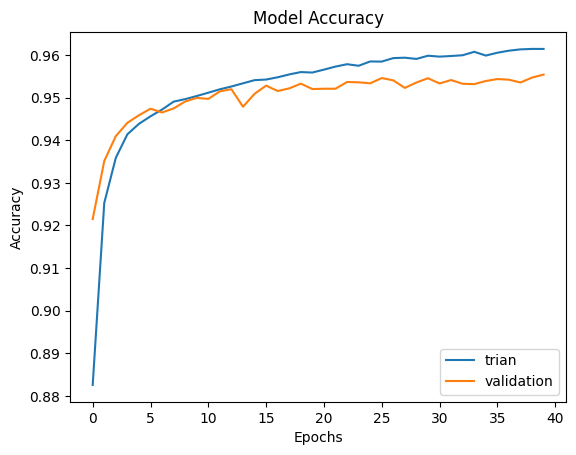

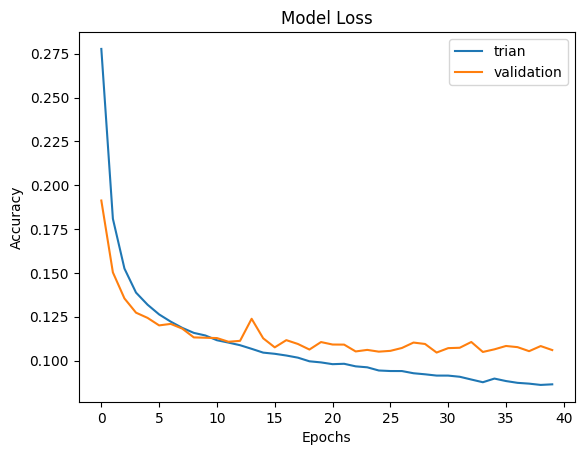

In [18]:
# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['trian', 'validation'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['trian', 'validation'], loc='upper right')
plt.show()

In [26]:
## 훈련 완료된 모델의 저장과 재사용
model.save('my_model.keras')

from tensorflow.keras.models import load_model
loaded_model = load_model('my_model.keras')      ## 저장된 모델 로드
print(loaded_model)
#predictions = loaded_model.predict(new_data)  ## 로드한 모델 사용 예시

<Sequential name=sequential_1, built=True>
